<a href="https://colab.research.google.com/github/mbmarcin/ml_/blob/main/wine_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl


dta = pd.read_csv('winequality-all.csv')
dta.iloc[:,:].describe().round(1).T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
fixed.acidity,7.2,1.3,3.8,6.4,7.0,7.7,15.9
volatile.acidity,0.3,0.2,0.1,0.2,0.3,0.4,1.6
citric.acid,0.3,0.1,0.0,0.2,0.3,0.4,1.7
residual.sugar,5.0,4.5,0.6,1.8,2.7,7.5,65.8
chlorides,0.1,0.0,0.0,0.0,0.0,0.1,0.6
free.sulfur.dioxide,30.0,17.8,1.0,16.0,28.0,41.0,289.0
total.sulfur.dioxide,114.1,56.8,6.0,74.0,116.0,153.2,440.0
density,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,3.2,0.2,2.7,3.1,3.2,3.3,4.0
sulphates,0.5,0.1,0.2,0.4,0.5,0.6,2.0


In [47]:
dta.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [48]:
wwhite = dta[dta.color == "white"]
wwhite = wwhite.iloc[:, 0:11]

y = wwhite.iloc[:, -1]
X = wwhite.iloc[:, :-1]

c = wwhite.corr('pearson')

# the strongest couple with corr
c = c.where(np.triu(np.ones(c.shape, dtype=np.bool),k=1)).stack().sort_values()
c.head(20)

density               alcohol               -0.760162
total.sulfur.dioxide  alcohol               -0.446643
fixed.acidity         pH                    -0.431274
residual.sugar        alcohol               -0.398167
chlorides             alcohol               -0.356928
free.sulfur.dioxide   alcohol               -0.251768
citric.acid           pH                    -0.183015
residual.sugar        pH                    -0.165997
volatile.acidity      citric.acid           -0.163228
fixed.acidity         alcohol               -0.110788
volatile.acidity      free.sulfur.dioxide   -0.102471
chlorides             pH                    -0.090573
citric.acid           alcohol               -0.076514
density               pH                    -0.063734
fixed.acidity         free.sulfur.dioxide   -0.058396
volatile.acidity      pH                    -0.046954
sulphates             alcohol               -0.022850
volatile.acidity      sulphates             -0.021150
residual.sugar        sulpha

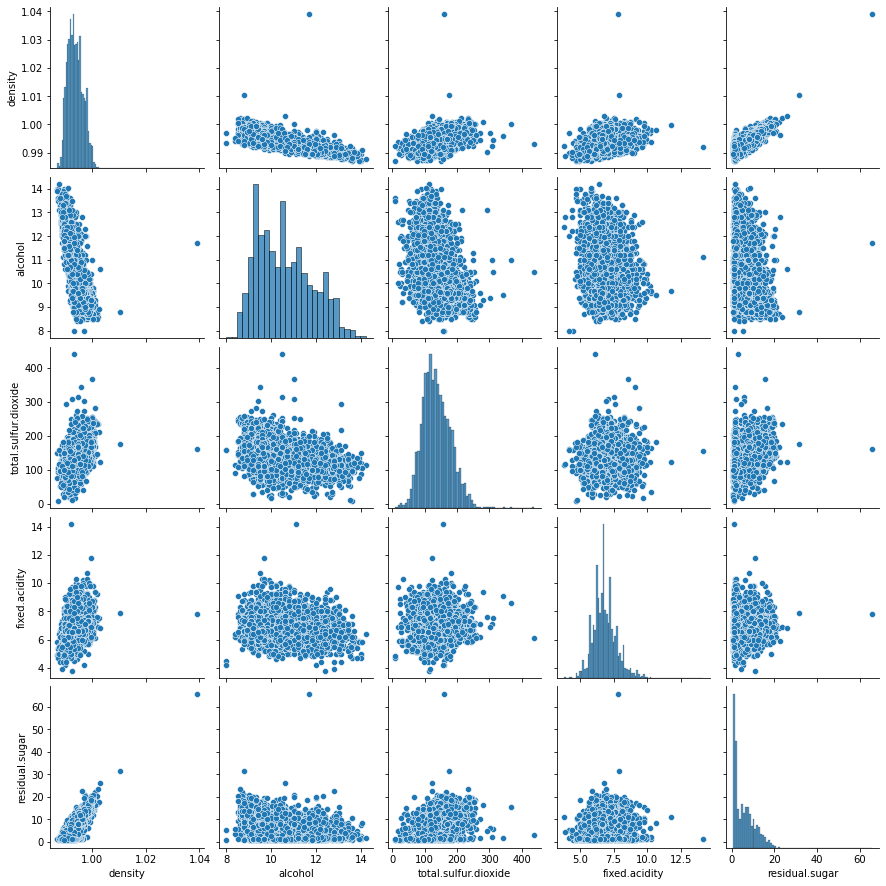

In [49]:
sns.pairplot(wwhite.loc[:, ['density', 'alcohol','total.sulfur.dioxide','fixed.acidity','residual.sugar']])

In [50]:
# liner reg for alcohol
import sklearn.linear_model
mnk = skl.linear_model.LinearRegression()
mnk.fit(X, y)

mnk.intercept_ # oszacowanie współczynika B[0]
mnk.coef_


array([ 5.08985834e-01,  8.91433570e-01,  4.16880125e-01,  2.42749178e-01,
       -3.94341133e-01, -3.33635324e-03,  2.79786508e-04, -6.87861040e+02,
        2.42818063e+00,  1.01964556e+00])

In [51]:
import sklearn.metrics as m

# rating of the quality of the model fit / ocena dopasowania modelu do danych źródłowych
y_pred = mnk.predict(X)

# y_pred.reshape(len(y_pred),1)
# d1 = pd.DataFrame(data=y_pred.reshape(len(y_pred),1),columns=['y_pred'])

# fitted values /jakość dopasowania modelu


print('R2')
print(mnk.score(X, y))
print(m.r2_score(y, y_pred))

# MSE (mean squared error) / błąd średniokwadoratowy
print('MSE')
print(m.mean_squared_error(y,y_pred))

# MAE (mean absloute error) / średnia modułów różnic
print('MAE')
print(m.mean_absolute_error(y, y_pred))

#MedAE (median absolute error) / mediana z modułów różnic
print('MedAE')
print(m.median_absolute_error(y, y_pred))

R2
0.8580656118411156
0.8580656118411156
MSE
0.21019074651654474
MAE
0.30140201967067853
MedAE
0.24887712240304083


In [52]:
# Train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3168, 10), (793, 10), (3168,), (793,))

In [53]:
def fit_regression(X_train, X_test, y_train, y_test):
  r = skl.linear_model.LinearRegression()
  r.fit(X_train, y_train)
  y_train_pred = r.predict(X_train)
  y_test_pred = r.predict(X_test)
  mse = m.mean_squared_error
  mae = m.mean_absolute_error

  return {
      "r_score": r.score(X_train, y_train),
      "MSE_tr": mse(y_train, y_train_pred),
      "MSE_t": mse(y_test, y_test_pred),
      "MAE_tr": mae(y_train, y_train_pred),
      "MAE_t": mae(y_test, y_test_pred)

  }

params = ["zm. liniowe"]
res = [fit_regression(X_train, X_test, y_train, y_test)]
df = pd.DataFrame(res, index=params)
df

,r_score,MSE_tr,MSE_t,MAE_tr,MAE_t
zm. liniowe,0.906772,0.138808,0.54539,0.282308,0.30647


In [54]:
import sklearn.preprocessing as pp   

# p2test = pp.PolynomialFeatures(degree=2, include_bias=False)
# print(p2test.fit_transform(np.array([[2,3,5], [1,2,3]])))
# print(p2test.powers_.T)

# model wielomianowy
p2 = pp.PolynomialFeatures(degree=2, include_bias=False)
X2_train = p2.fit_transform(X_train)
X2_test = p2.fit_transform(X_test)
params.append("zm. wielom.")
res.append(fit_regression(X2_train, X2_test, y_train, y_test))
result = pd.DataFrame(res, index=params)
result

,r_score,MSE_tr,MSE_t,MAE_tr,MAE_t
zm. liniowe,0.906772,0.138808,0.54539,0.282308,0.306470
zm. wielom.,0.923976,0.113192,0.15542,0.257613,0.267944


              r_score    MSE_tr     MSE_t    MAE_tr     MAE_t
zm. liniowe  0.906772  0.138808  0.545390  0.282308  0.306470
zm. wielom.  0.923976  0.113192  0.155420  0.257613  0.267944
zm. wybrane  0.919735  0.119507  0.130868  0.264148  0.270433


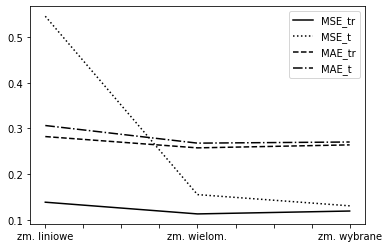

In [55]:
import sklearn.metrics as m_
#BIC ->Bayesian information criteria / wybór zmiennych do modelu -----> slearn.feature_selections --->SelectKbest

def BIC(mse, p, n):
  return n*np.log(mse) + p*np.log(n)

def forward_selection(X, y):
  n, m = X.shape
  best_idx = []
  best_free = set(range(m))
  best_fit = np.inf
  res = list()

  for i in range(0, m):
    cur_inx = -1
    cur_fit = np.inf

    for e in best_free:
      r = skl.linear_model.LinearRegression()
      test_idx = best_idx+[e]
      r.fit(X[:, test_idx], y)
      test_fit = BIC(m_.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
      
      if test_fit < cur_fit:cur_idx, cur_fit = e, test_fit
    if cur_fit > best_fit: break
    best_idx, best_fit = best_idx + [cur_idx], cur_fit
    best_free.discard(cur_idx)
    res.append((cur_idx, cur_fit))
  return res

select = pd.DataFrame(forward_selection(X2_train, y_train),columns=['var','BIC'])
select_var = select['var'].tolist()
select['name'] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in p2.powers_[select_var]]
#print(select.head())

params.append('zm. wybrane')
res.append(fit_regression(X2_train[:, select_var], X2_test[:, select_var], y_train,y_test))
result = pd.DataFrame(res, index=params)
print(result)

result.drop(['r_score'], axis=1).plot(style=["-",":","--","-."], color='k')
plt.show()

In [56]:
#### Classifications /klasyfikacje 

val = dta['response'].value_counts()
val.iloc[np.argsort(val.index)]

1      30
2     206
3    1752
4    2323
5     856
6     148
7       5
Name: response, dtype: int64

In [57]:
dta['quality'] = pd.cut(dta['response'], [0, 5, 10], right=False, labels=['złe', 'dobre'])
dta['quality'].value_counts()

X = dta.iloc[:, 0:11]
y = dta['quality']

yk = y.cat.codes.values
i = np.random.choice(np.arange(len(yk)), 10, replace=False)


# dta.loc[:, ['response','quality']].drop_duplicates()
# pd.Series(['a', 'b', 'c', 'a', 'b', 'c'], dtype="category").cat.codes.values


In [72]:
idx_train, idx_test = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=12345)
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
y_train, y_test = y[idx_train], y[idx_test]
yk_train, yk_test = yk[idx_train], yk[idx_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


2767    dobre
3311    dobre
4614      złe
4857    dobre
3373    dobre
        ...  
3497    dobre
3492      złe
2177      złe
3557    dobre
4578    dobre
Name: quality, Length: 4256, dtype: category
Categories (2, object): ['złe' < 'dobre']

In [59]:
# knn / k-nearst neighbors / k-najbliższych sąsiadów

import sklearn.neighbors as knn_

knn = knn_.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, yk_train)

yk_pred = knn.predict(X_test)
yk_pred[[0,250,500,570,1000]]

y_pred = y.cat.categories[yk_pred]
y_pred[[0,250,500,570,1000]]

y_test.values[[0,250,500,570,1000]]

['złe', 'złe', 'złe', 'złe', 'złe']
Categories (2, object): ['złe' < 'dobre']

In [60]:
# ACC (accuracy)--> ocena jakości modelu ????

print(m_.accuracy_score(yk_test, yk_pred))
print(knn.score(X_test, yk_test))

print('\nMacierz pomyłek\n', m_.confusion_matrix(yk_test, yk_pred))

# precision /precyzja
print('\n', m_.precision_score(yk_test, yk_pred))

# sensitivity or recall / czułość 
print('\n', m_.recall_score(yk_test, yk_pred))

# miara F1
print('\n', m_.f1_score(yk_test, yk_pred))



0.7913533834586466
0.7913533834586466

Macierz pomyłek
 [[805  70]
 [152  37]]

 0.34579439252336447

 0.19576719576719576

 0.25


In [61]:
# functions for fit model
# import sklearn.neighbors as knn_

def fit_classifier(alg, X_train, X_test, y_train, y_test):
  #import sklearn.metrics as m_

  alg.fit(X_train, y_train)
  y_pred = alg.predict(X_test)
  
  metrics = {
      'ACC': m_.accuracy_score(y_test, y_pred),
      'P': m_.precision_score(y_test, y_pred),
      'R': m_.recall_score(y_test, y_pred),
      'F1': m_.f1_score(y_test, y_pred)

  }

  return metrics

m = X_train.mean(axis=0)
s = X_train.std(axis=0, ddof=1)

x = pd.Series(fit_classifier(knn_.KNeighborsClassifier(n_neighbors=5), (X_train-m)/s,(X_test-m)/s, yk_train, yk_test))

x

ACC    0.841165
P      0.563291
R      0.470899
F1     0.512968
dtype: float64

In [75]:
# decision tree

import sklearn.tree
import sklearn.ensemble
# from matplotlib import pyplot as plt
# from sklearn import tree


t = sklearn.tree.DecisionTreeClassifier()
print(pd.Series(fit_classifier(t, (X_train-m)/s,(X_test-m)/s, yk_train, yk_test)))

forest = sklearn.ensemble.RandomForestClassifier(random_state=123)
print(pd.Series(fit_classifier(forest, (X_train-m)/s,(X_test-m)/s, yk_train, yk_test)))

# fig = plt.figure(figsize=(55,40))
# _ = tree.plot_tree(t, 
#                    feature_names=X_train.columns,  
#                    class_names=y_train,
#                    filled=True)


ACC    0.793233
P      0.430493
R      0.507937
F1     0.466019
dtype: float64
ACC    0.856203
P      0.645161
R      0.423280
F1     0.511182
dtype: float64


In [85]:
pd.Series(forest.feature_importances_,index=X.columns[0:11]).sort_values(ascending=False)
# im wyższa wartośc tym większy wpływ danej zmiennej na podejmowane decyzje. 

dta.alcohol.groupby(dta.quality).describe().reset_index()


,quality,count,mean,std,min,25%,50%,75%,max
0,złe,4311.0,10.309587,1.067665,8.0,9.5,10.1,11.0,14.9
1,dobre,1009.0,11.573175,1.119081,8.5,10.8,11.6,12.4,14.2


In [101]:
# Crossvalidation
from sklearn.model_selection import KFold

arr = np.arange(6)

kf = KFold(n_splits=3, random_state=None, shuffle=False)
for train, test in kf.split(arr):
  print(train, test)

# for train, test in KFold(n_splits=3):
#   print(train, test, spe=",")

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]
